In [35]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
import math

In [36]:
def inp(w, x, b):
    return w * x + b


def out(t):
    return np.tanh(t)


def neuron(w, x, b):
    return out(inp(w, x, b))


def tanh_deriv(x):
    t = np.tanh(x)**2
    return 1.0 - t


def neuron_der_b(w, x, b):
    return tanh_deriv(inp(w, x, b))
  
    
def neuron_der_w(w, x, b):
    return tanh_deriv(inp(w, x, b)) * x


def pred(x, w11_x, w11_b, w21_x, w2_b):
    return (w21_x * neuron(w11_x, x, w11_b) + w2_b)


def func(x):
    return np.sin(math.pi / 2 * x)


def loss(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = (p - func(item)) * (p - func(item))
        l = l + sq
    print "Loss = " + str(l)
    return l


def loss_deriv_w2_b(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item))
        l = l + sq
#    print "Loss_deriv_w2_b = " + str(l)
    return l


def loss_deriv_w21_x(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * neuron(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w21_x = " + str(l)
    return l    



def loss_deriv_w11_x(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_w(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w21_x = " + str(l)
    return l    


def loss_deriv_w11_b(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_b(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w11_b = " + str(l)
    return l



In [37]:
epochs = 1000

step_lin_w_x = 0.001
step_lin_w_b = 0.01

#x = np.arange(0, math.pi, 0.05)
x = np.arange(0, 1.05, 0.05)
print x
y = func(x)
print y

w11_x = uniform(0, 1)
w11_b = uniform(0, 1)

w21_x = uniform(0, 1)
w2_b  = uniform(0, 1)


[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]
[ 0.          0.0784591   0.15643447  0.23344536  0.30901699  0.38268343
  0.4539905   0.52249856  0.58778525  0.64944805  0.70710678  0.76040597
  0.80901699  0.85264016  0.89100652  0.92387953  0.95105652  0.97236992
  0.98768834  0.99691733  1.        ]


<IPython.core.display.Javascript object>


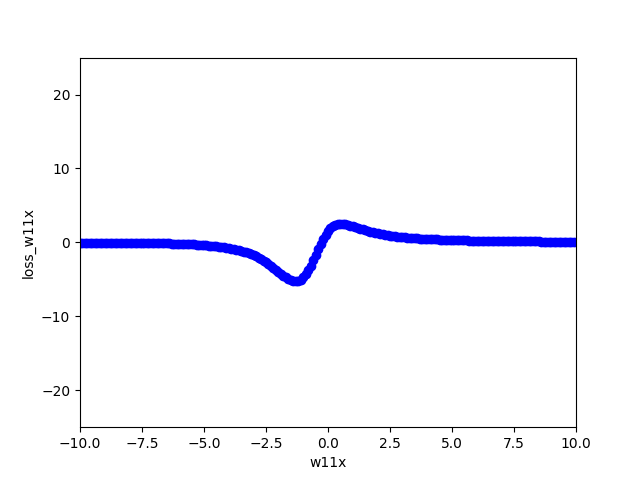

In [38]:
w11x_p =np.arange(-10,10,0.1)
loss_w11x_p = loss_deriv_w11_x(x, w11x_p, w11_b, w21_x, w2_b)

fig,(lw11x) = plt.subplots(1,1, sharex = False, sharey = False)

lw11x.set_xlabel('w11x')
lw11x.set_ylabel('loss_w11x')
lw11x.set_xlim(-10, 10)
lw11x.set_ylim(-25, 25)
lw11x.scatter(w11x_p, loss_w11x_p, color = 'b')

<IPython.core.display.Javascript object>


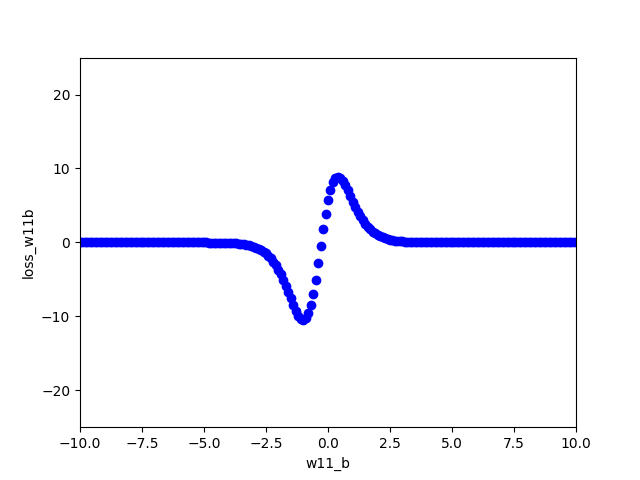

In [39]:
w11b_p =np.arange(-10,10,0.1)
loss_w11b_p = loss_deriv_w11_b(x, w11_x, w11b_p, w21_x, w2_b)

fig,(lw11b) = plt.subplots(1,1, sharex = False, sharey = False)

lw11b.set_xlabel('w11_b')
lw11b.set_ylabel('loss_w11b')
lw11b.set_xlim(-10, 10)
lw11b.set_ylim(-25, 25)
lw11b.scatter(w11b_p, loss_w11b_p, color = 'b')

<IPython.core.display.Javascript object>


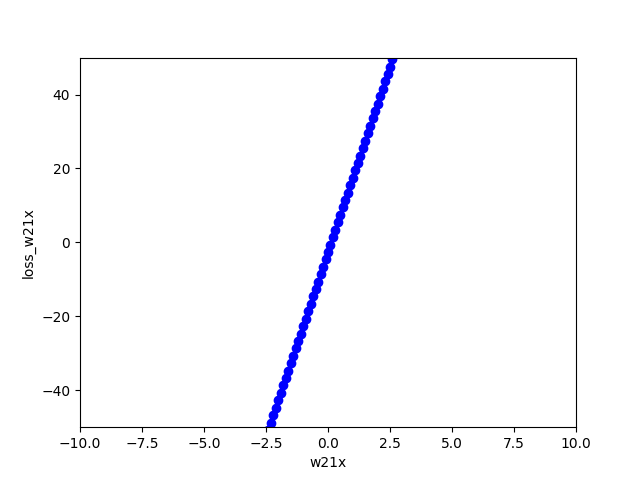

In [40]:
w21x_p =np.arange(-10,10,0.1)
loss_w21x_p = loss_deriv_w21_x(x, w11_x, w11_b, w21x_p, w2_b)

fig,(lw21x) = plt.subplots(1,1, sharex = False, sharey = False)

lw21x.set_xlabel('w21x')
lw21x.set_ylabel('loss_w21x')
lw21x.set_xlim(-10, 10)
lw21x.set_ylim(-50, 50)
lw21x.scatter(w21x_p, loss_w21x_p, color = 'b')

<IPython.core.display.Javascript object>


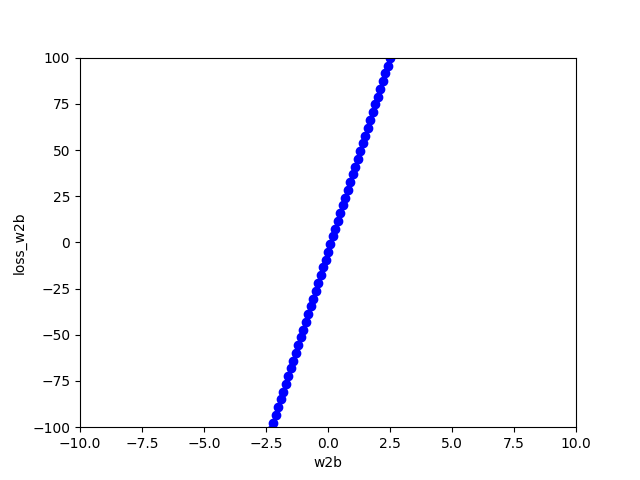

In [41]:
w2b_p =np.arange(-10,10,0.1)
loss_w2b_p = loss_deriv_w2_b(x, w11_x, w11_b, w21_x, w2b_p)

fig,(lw2b) = plt.subplots(1,1, sharex = False, sharey = False)

lw2b.set_xlabel('w2b')
lw2b.set_ylabel('loss_w2b')
lw2b.set_xlim(-10, 10)
lw2b.set_ylim(-100, 100)
lw2b.scatter(w2b_p, loss_w2b_p, color = 'b')

<IPython.core.display.Javascript object>


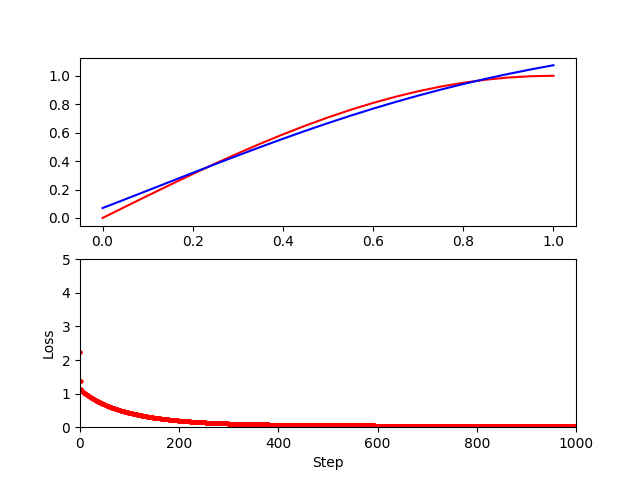

(0, 5)

In [42]:
#fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = False, sharey = False)

fig,(ax1, ax2) = plt.subplots(2,1, sharex = False, sharey = False)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0, 1.05)
ax1.set_ylim(0, 2)
ax1.set_xlabel("X")
ax1.plot(x, y, color = 'r')

ax2.set_xlabel("Step")
ax2.set_ylabel("Loss")
ax2.set_xlim(0, epochs)
ax2.set_ylim(0, 5)



In [43]:
for i in range(epochs):
    l = loss(x, w11_x, w11_b, w21_x, w2_b)
    ax2.scatter(i, l, color = 'r', s=5)
    
    w21_x_new = w21_x - step_lin_w_x * loss_deriv_w21_x(x, w11_x, w11_b, w21_x, w2_b)

    w2_b_new = w2_b - step_lin_w_b * loss_deriv_w2_b(x, w11_x, w11_b, w21_x, w2_b)

    w11_x_new = w11_x - step_lin_w_x * loss_deriv_w11_x(x, w11_x, w11_b, w21_x, w2_b)
    w11_b_new = w11_b - step_lin_w_b * loss_deriv_w11_b(x, w11_x, w11_b, w21_x, w2_b)
        
    w21_x = w21_x_new
    w2_b = w2_b_new
    
    w11_x = w11_x_new
    w11_b = w11_b_new
 
    print "w11_x = " + str(w11_x)
    print "w11_b = " + str(w11_b)
    print "w21_x = " + str(w21_x)
    print "w2_b = " + str(w2_b)
    
    z = pred(x, w11_x, w11_b, w21_x, w2_b)
    ax1.clear()
    #print x
    #print y
    ax1.plot(x, y, color = 'r')
    ax1.plot(x, z, color = 'b')
    
    fig.canvas.draw()
    


Loss = 5.805461673
w11_x = 0.664698107511
w11_b = 0.442520611398
w21_x = 0.72961095498
w2_b = 0.393253864966
Loss = 2.25061635238
w11_x = 0.663779404685
w11_b = 0.391722341215
w21_x = 0.724724588377
w2_b = 0.298073008786
Loss = 1.36291258458
w11_x = 0.66377130186
w11_b = 0.361644522489
w21_x = 0.723236643797
w2_b = 0.253540133348
Loss = 1.14470007848
w11_x = 0.664255144281
w11_b = 0.342588706631
w21_x = 0.723311962218
w2_b = 0.233847172506
Loss = 1.08630776232
w11_x = 0.66499209485
w11_b = 0.329105974609
w21_x = 0.724111699688
w2_b = 0.226114815092
Loss = 1.06482654683
w11_x = 0.66585745488
w11_b = 0.318375693501
w21_x = 0.725249512969
w2_b = 0.224075893802
Loss = 1.05173001852
w11_x = 0.666789043116
w11_b = 0.308999506759
w21_x = 0.726546394099
w2_b = 0.224728523968
Loss = 1.04055436247
w11_x = 0.667756576059
w11_b = 0.300300395742
w21_x = 0.727919166037
w2_b = 0.226649000018
Loss = 1.02985725227
w11_x = 0.668745472773
w11_b = 0.291955330857
w21_x = 0.72932913271
w2_b = 0.2291664617
L

Loss = 0.538703397297
w11_x = 0.743943354963
w11_b = -0.0767219451489
w21_x = 0.822238244154
w2_b = 0.39986697613
Loss = 0.533847177924
w11_x = 0.745146313839
w11_b = -0.0802448129342
w21_x = 0.823572537716
w2_b = 0.401721286027
Loss = 0.529049284642
w11_x = 0.746348104468
w11_b = -0.0837183300897
w21_x = 0.824902746712
w2_b = 0.403550197639
Loss = 0.524308718845
w11_x = 0.74754865124
w11_b = -0.0871432121769
w21_x = 0.826228855446
w2_b = 0.405353892159
Loss = 0.519624500793
w11_x = 0.74874788045
w11_b = -0.0905201668112
w21_x = 0.827550849198
w2_b = 0.407132556392
Loss = 0.514995669638
w11_x = 0.749945720261
w11_b = -0.0938498935061
w21_x = 0.82886871417
w2_b = 0.408886382294
Loss = 0.510421283415
w11_x = 0.751142100662
w11_b = -0.0971330835371
w21_x = 0.830182437439
w2_b = 0.410615566542
Loss = 0.505900418993
w11_x = 0.752336953427
w11_b = -0.100370419826
w21_x = 0.831492006909
w2_b = 0.412320310119
Loss = 0.501432171987
w11_x = 0.753530212082
w11_b = -0.103562576845
w21_x = 0.832797

w11_b = -0.2397522782
w21_x = 0.908529277636
w2_b = 0.481655295541
Loss = 0.290800260904
w11_x = 0.826558280798
w11_b = -0.241053463956
w21_x = 0.909554372213
w2_b = 0.482204405163
Loss = 0.288550266049
w11_x = 0.827557258421
w11_b = -0.242337467014
w21_x = 0.910575292461
w2_b = 0.482742438922
Loss = 0.28632149901
w11_x = 0.828552685066
w11_b = -0.243604513072
w21_x = 0.911592043411
w2_b = 0.483269535082
Loss = 0.284113747972
w11_x = 0.829544554642
w11_b = -0.244854824072
w21_x = 0.912604630196
w2_b = 0.483785830059
Loss = 0.28192680444
w11_x = 0.830532861446
w11_b = -0.246088618274
w21_x = 0.913613058049
w2_b = 0.484291458442
Loss = 0.27976046314
w11_x = 0.831517600151
w11_b = -0.247306110316
w21_x = 0.9146173323
w2_b = 0.484786553001
Loss = 0.277614521927
w11_x = 0.832498765798
w11_b = -0.248507511278
w21_x = 0.915617458379
w2_b = 0.485271244716
Loss = 0.275488781696
w11_x = 0.833476353793
w11_b = -0.249693028753
w21_x = 0.916613441813
w2_b = 0.485745662786
Loss = 0.273383046297
w11_

Loss = 0.172876244936
w11_x = 0.88935953232
w11_b = -0.300372420082
w21_x = 0.972806494321
w2_b = 0.49949726786
Loss = 0.171744831499
w11_x = 0.890104472406
w11_b = -0.300837347437
w21_x = 0.973545826959
w2_b = 0.499506196275
Loss = 0.170624390398
w11_x = 0.89084609249
w11_b = -0.301294853857
w21_x = 0.974281586172
w2_b = 0.499510411373
Loss = 0.169514821616
w11_x = 0.891584401949
w11_b = -0.301745011929
w21_x = 0.975013782916
w2_b = 0.499509962651
Loss = 0.168416025882
w11_x = 0.892319410254
w11_b = -0.302187893242
w21_x = 0.975742428199
w2_b = 0.499504898932
Loss = 0.16732790467
w11_x = 0.893051126973
w11_b = -0.302623568404
w21_x = 0.976467533084
w2_b = 0.499495268374
Loss = 0.16625036019
w11_x = 0.893779561768
w11_b = -0.30305210706
w21_x = 0.977189108684
w2_b = 0.499481118484
Loss = 0.165183295379
w11_x = 0.894504724392
w11_b = -0.30347357791
w21_x = 0.977907166165
w2_b = 0.499462496125
Loss = 0.164126613898
w11_x = 0.895226624686
w11_b = -0.303888048724
w21_x = 0.978621716742
w2_

Loss = 0.113634272073
w11_x = 0.935676384706
w11_b = -0.318456217487
w21_x = 1.01811307342
w2_b = 0.490243533708
Loss = 0.113082162401
w11_x = 0.936207690083
w11_b = -0.318523274765
w21_x = 1.01862269734
w2_b = 0.490006092064
Loss = 0.112535403751
w11_x = 0.936736507699
w11_b = -0.318586403946
w21_x = 1.01912963325
w2_b = 0.489766297837
Loss = 0.111993939801
w11_x = 0.937262849776
w11_b = -0.318645636028
w21_x = 1.01963389373
w2_b = 0.489524171474
Loss = 0.11145771472
w11_x = 0.937786728533
w11_b = -0.318701001721
w21_x = 1.02013549135
w2_b = 0.489279733217
Loss = 0.110926673165
w11_x = 0.938308156181
w11_b = -0.318752531454
w21_x = 1.02063443869
w2_b = 0.489033003107
Loss = 0.11040076028
w11_x = 0.938827144927
w11_b = -0.318800255374
w21_x = 1.0211307483
w2_b = 0.488784000989
Loss = 0.109879921693
w11_x = 0.93934370697
w11_b = -0.318844203358
w21_x = 1.02162443273
w2_b = 0.488532746516
Loss = 0.109364103512
w11_x = 0.939857854498
w11_b = -0.318884405008
w21_x = 1.02211550453
w2_b = 0.

Loss = 0.0841037687153
w11_x = 0.969048987999
w11_b = -0.314547153249
w21_x = 1.04936404772
w2_b = 0.467454637213
Loss = 0.0838243618933
w11_x = 0.969428121763
w11_b = -0.314392729879
w21_x = 1.0497076969
w2_b = 0.467088221976
Loss = 0.0835472958281
w11_x = 0.969805617851
w11_b = -0.314236113891
w21_x = 1.05004953797
w2_b = 0.466720581572
Loss = 0.0832725434649
w11_x = 0.970181486567
w11_b = -0.31407732324
w21_x = 1.05038958172
w2_b = 0.466351727594
Loss = 0.083000078046
w11_x = 0.970555738174
w11_b = -0.313916375778
w21_x = 1.05072783893
w2_b = 0.465981671574
Loss = 0.0827298731082
w11_x = 0.970928382895
w11_b = -0.313753289253
w21_x = 1.05106432032
w2_b = 0.465610424976
Loss = 0.0824619024807
w11_x = 0.971299430913
w11_b = -0.313588081313
w21_x = 1.05139903659
w2_b = 0.465237999204
Loss = 0.0821961402821
w11_x = 0.971668892372
w11_b = -0.313420769506
w21_x = 1.0517319984
w2_b = 0.4648644056
Loss = 0.0819325609183
w11_x = 0.972036777374
w11_b = -0.313251371279
w21_x = 1.05206321637
w2

Loss = 0.0684632851123
w11_x = 0.993017594677
w11_b = -0.298529722182
w21_x = 1.07032871618
w2_b = 0.438147627981
Loss = 0.0682995553229
w11_x = 0.993301655595
w11_b = -0.298256930207
w21_x = 1.0705663432
w2_b = 0.437718930635
Loss = 0.0681368274618
w11_x = 0.993584720137
w11_b = -0.297983034906
w21_x = 1.07080284696
w2_b = 0.437289721865
Loss = 0.0679750902445
w11_x = 0.993866795496
w11_b = -0.297708048594
w21_x = 1.07103823533
w2_b = 0.436860009923
Loss = 0.0678143325305
w11_x = 0.994147888823
w11_b = -0.297431983527
w21_x = 1.07127251612
w2_b = 0.436429803029
Loss = 0.0676545433214
w11_x = 0.994428007226
w11_b = -0.2971548519
w21_x = 1.07150569712
w2_b = 0.435999109362
Loss = 0.0674957117594
w11_x = 0.994707157769
w11_b = -0.296876665848
w21_x = 1.07173778605
w2_b = 0.43556793707
Loss = 0.0673378271256
w11_x = 0.994985347478
w11_b = -0.296597437442
w21_x = 1.07196879062
w2_b = 0.435136294264
Loss = 0.0671808788388
w11_x = 0.995262583332
w11_b = -0.296317178698
w21_x = 1.07219871849


Loss = 0.0584637430183
w11_x = 1.01176587772
w11_b = -0.276094106072
w21_x = 1.08534216834
w2_b = 0.405537439942
Loss = 0.0583513403013
w11_x = 1.01199299848
w11_b = -0.275769176127
w21_x = 1.08551529984
w2_b = 0.40509092848
Loss = 0.0582394023934
w11_x = 1.01221954733
w11_b = -0.275443899865
w21_x = 1.08568778261
w2_b = 0.404644422411
Loss = 0.0581279250818
w11_x = 1.0124455286
w11_b = -0.275118285479
w21_x = 1.08585962165
w2_b = 0.404197927422
Loss = 0.0580169042103
w11_x = 1.01267094663
w11_b = -0.274792341109
w21_x = 1.08603082195
w2_b = 0.403751449162
Loss = 0.0579063356785
w11_x = 1.0128958057
w11_b = -0.274466074845
w21_x = 1.08620138843
w2_b = 0.403304993249
Loss = 0.057796215441
w11_x = 1.01312011008
w11_b = -0.274139494724
w21_x = 1.08637132603
w2_b = 0.402858565263
Loss = 0.0576865395069
w11_x = 1.01334386399
w11_b = -0.273812608731
w21_x = 1.0865406396
w2_b = 0.402412170751
Loss = 0.0575773039385
w11_x = 1.01356707163
w11_b = -0.273485424801
w21_x = 1.08670933399
w2_b = 0.4

w2_b = 0.372838660022
Loss = 0.0510959603211
w11_x = 1.02746964223
w11_b = -0.251254862713
w21_x = 1.09682570158
w2_b = 0.372405651353
Loss = 0.0510097458195
w11_x = 1.02766392232
w11_b = -0.25092329218
w21_x = 1.09696192719
w2_b = 0.371972975322
Loss = 0.0509237944707
w11_x = 1.02785787636
w11_b = -0.250591851815
w21_x = 1.09709779375
w2_b = 0.371540635087
Loss = 0.0508381046735
w11_x = 1.02805150669
w11_b = -0.250260546186
w21_x = 1.0972333041
w2_b = 0.37110863377
Loss = 0.0507526748454
w11_x = 1.0282448156
w11_b = -0.249929379823
w21_x = 1.09736846101
w2_b = 0.370676974463
Loss = 0.0506675034224
w11_x = 1.02843780537
w11_b = -0.249598357209
w21_x = 1.09750326727
w2_b = 0.370245660224
Loss = 0.0505825888583
w11_x = 1.02863047827
w11_b = -0.249267482783
w21_x = 1.09763772562
w2_b = 0.369814694082
Loss = 0.0504979296252
w11_x = 1.02882283654
w11_b = -0.248936760945
w21_x = 1.09777183878
w2_b = 0.369384079032
Loss = 0.0504135242123
w11_x = 1.02901488238
w11_b = -0.248606196049
w21_x = 1

Loss = 0.0454109524927
w11_x = 1.0409188848
w11_b = -0.2276318056
w21_x = 1.10597822055
w2_b = 0.341863629921
Loss = 0.0453406458562
w11_x = 1.04109430927
w11_b = -0.22731923238
w21_x = 1.10609432073
w2_b = 0.34146179356
Loss = 0.0452705206736
w11_x = 1.04126953048
w11_b = -0.227007019623
w21_x = 1.10621021391
w2_b = 0.341060443483
Loss = 0.0452005761686
w11_x = 1.04144454957
w11_b = -0.226695169198
w21_x = 1.10632590156
w2_b = 0.340659580779
Loss = 0.0451308115711
w11_x = 1.04161936767
w11_b = -0.226383682944
w21_x = 1.10644138509
w2_b = 0.340259206509
Loss = 0.0450612261169
w11_x = 1.0417939859
w11_b = -0.22607256267
w21_x = 1.10655666593
w2_b = 0.339859321717
Loss = 0.0449918190479
w11_x = 1.04196840536
w11_b = -0.225761810158
w21_x = 1.10667174548
w2_b = 0.33945992742
Loss = 0.044922589612
w11_x = 1.04214262716
w11_b = -0.225451427157
w21_x = 1.10678662512
w2_b = 0.339061024614
Loss = 0.0448535370627
w11_x = 1.04231665237
w11_b = -0.22514141539
w21_x = 1.10690130624
w2_b = 0.338662

w21_x = 1.11398573127
w2_b = 0.313852642115
Loss = 0.0406539753487
w11_x = 1.05341342902
w11_b = -0.205565112889
w21_x = 1.11408975831
w2_b = 0.313487911195
Loss = 0.0405953192637
w11_x = 1.05357625014
w11_b = -0.20528256159
w21_x = 1.11419365329
w2_b = 0.313123695572
Loss = 0.0405367995924
w11_x = 1.05373892709
w11_b = -0.205000441522
w21_x = 1.11429741691
w2_b = 0.31275999507
Loss = 0.040478415854
w11_x = 1.05390146041
w11_b = -0.204718752882
w21_x = 1.11440104983
w2_b = 0.312396809501
Loss = 0.0404201675704
w11_x = 1.0540638506
w11_b = -0.20443749585
w21_x = 1.11450455271
w2_b = 0.312034138666
Loss = 0.0403620542659
w11_x = 1.05422609818
w11_b = -0.204156670592
w21_x = 1.11460792623
w2_b = 0.311671982353
Loss = 0.0403040754671
w11_x = 1.05438820366
w11_b = -0.203876277259
w21_x = 1.11471117103
w2_b = 0.311310340339
Loss = 0.0402462307034
w11_x = 1.05455016754
w11_b = -0.203596315986
w21_x = 1.11481428775
w2_b = 0.310949212391
Loss = 0.0401885195064
w11_x = 1.05471199031
w11_b = -0.2

Loss = 0.0367031390865
w11_x = 1.06494793252
w11_b = -0.186069735603
w21_x = 1.12136394693
w2_b = 0.28823129775
Loss = 0.0366533146918
w11_x = 1.06510132303
w11_b = -0.185818378204
w21_x = 1.12145964746
w2_b = 0.28790359481
Loss = 0.0366035971456
w11_x = 1.0652545964
w11_b = -0.185567434777
w21_x = 1.12155525089
w2_b = 0.287576369871
Loss = 0.0365539861079
w11_x = 1.06540775289
w11_b = -0.185316904759
w21_x = 1.12165075755
w2_b = 0.287249622191
Loss = 0.0365044812401
w11_x = 1.06556079275
w11_b = -0.185066787587
w21_x = 1.12174616774
w2_b = 0.286923351027
Loss = 0.0364550822052
w11_x = 1.06571371623
w11_b = -0.184817082688
w21_x = 1.12184148175
w2_b = 0.286597555629
Loss = 0.0364057886677
w11_x = 1.06586652356
w11_b = -0.184567789486
w21_x = 1.12193669989
w2_b = 0.286272235245
Loss = 0.0363566002934
w11_x = 1.066019215
w11_b = -0.184318907398
w21_x = 1.12203182246
w2_b = 0.285947389119
Loss = 0.0363075167496
w11_x = 1.06617179078
w11_b = -0.184070435837
w21_x = 1.12212684975
w2_b = 0.2

Loss = 0.0333271017777
w11_x = 1.07585116204
w11_b = -0.168768798965
w21_x = 1.12811119601
w2_b = 0.265515887123
Loss = 0.0332842674395
w11_x = 1.07599654803
w11_b = -0.168545926304
w21_x = 1.12820045899
w2_b = 0.265220962903
Loss = 0.0332415185528
w11_x = 1.07614183073
w11_b = -0.168323416835
w21_x = 1.12828964105
w2_b = 0.26492645647
Loss = 0.0331988548669
w11_x = 1.07628701029
w11_b = -0.168101269788
w21_x = 1.12837874235
w2_b = 0.264632366962
Loss = 0.0331562761321
w11_x = 1.07643208684
w11_b = -0.16787948439
w21_x = 1.12846776304
w2_b = 0.264338693518
Loss = 0.0331137820997
w11_x = 1.07657706054
w11_b = -0.167658059869
w21_x = 1.12855670328
w2_b = 0.264045435279
Loss = 0.0330713725218
w11_x = 1.07672193151
w11_b = -0.167436995452
w21_x = 1.12864556321
w2_b = 0.263752591384
Loss = 0.0330290471519
w11_x = 1.07686669991
w11_b = -0.167216290364
w21_x = 1.128734343
w2_b = 0.263460160972
Loss = 0.032986805744
w11_x = 1.07701136586
w11_b = -0.166995943833
w21_x = 1.12882304278
w2_b = 0.2

Loss = 0.0304101909064
w11_x = 1.08620103158
w11_b = -0.15340548366
w21_x = 1.13442327783
w2_b = 0.245031413314
Loss = 0.0303729931054
w11_x = 1.08633921153
w11_b = -0.15320709838
w21_x = 1.13450698046
w2_b = 0.244764764778
Loss = 0.0303358648135
w11_x = 1.08647729697
w11_b = -0.153009020534
w21_x = 1.1345906111
w2_b = 0.24449847323
Loss = 0.030298805842
w11_x = 1.08661528803
w11_b = -0.152811249391
w21_x = 1.13467416985
w2_b = 0.244232537884
Loss = 0.0302618160026
w11_x = 1.08675318479
w11_b = -0.15261378422
w21_x = 1.13475765679
w2_b = 0.243966957955
Loss = 0.0302248951081
w11_x = 1.08689098736
w11_b = -0.152416624292
w21_x = 1.13484107204
w2_b = 0.243701732659
Loss = 0.0301880429717
w11_x = 1.08702869585
w11_b = -0.15221976888
w21_x = 1.13492441568
w2_b = 0.243436861218
Loss = 0.0301512594074
w11_x = 1.08716631035
w11_b = -0.152023217257
w21_x = 1.13500768781
w2_b = 0.24317234285
Loss = 0.0301145442299
w11_x = 1.08730383097
w11_b = -0.151826968698
w21_x = 1.13509088853
w2_b = 0.2429